In [49]:
import operator

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

import seaborn as sns
sns.set()

import scipy.stats as ss

from IPython.display import display, Markdown, Math, Latex

from keras.datasets import cifar10
from keras.models import load_model

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 30s 0us/step


In [21]:
model = load_model('saved_models/keras_cifar10_trained_model.h5')

Take a random sample of CFAR images to predict.

In [41]:
cfar_sample = np.array([x_test[i] for i in np.random.randint(x_test.shape[0], size=(6))])

In [84]:
cfar_categories = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
def get_category(x):
    return cfar_categories[max(enumerate(x), key=operator.itemgetter(1))[0]]

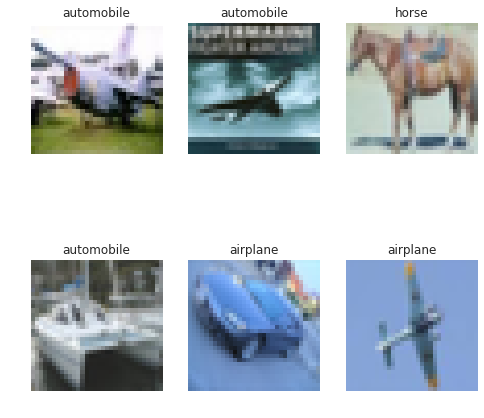

In [85]:
columns = 3
rows = 2
img_arr = x_test[np.random.randint(x_test.shape[0], size=(columns*rows))]
predictions = [get_category(model.predict(img_arr)[i]) for i in range(len(img_arr))]
fig=plt.figure(figsize=(8, 8))
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(img_arr[i - 1])
    plt.axis('off');
    plt.title(predictions[i - 1])
plt.show()
fig.savefig('cfar-predictions.png')